# Barplot of GitHub page content

First, import all the necessary packages for running this notebook.

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Then, read in CSV file containg information on elements across all pages of each GitHub repository

In [2]:
all_pages = pd.read_csv('data/all_pages.csv', header=0)

Inspect dataframe

In [3]:
all_pages.head()

,organization_or_project_name,getting_started,about_section,how_to_contribute,history,copyright_information,funding_and_acknowledgements,visual_structure_of_repo,recommended_citation,archived_version_and_upcoming_version,resources,description_of_terms,best_practices_guide_to_apply_standard
0,Darwin Core,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,EML,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
2,Ecological Trait Data Standard,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0
3,MIxS,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
4,IGSN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


Caclulate the sum of each column. This function transposes the table and tells us how many (for example) repositories in the review contained a 'getting started' section

In [4]:
all_pages_totals = all_pages.sum()
print(all_pages_totals)

organization_or_project_name              Darwin CoreEMLEcological Trait Data StandardMI...
getting_started                                                                        11.0
about_section                                                                          30.0
how_to_contribute                                                                      20.0
history                                                                                10.0
copyright_information                                                                  18.0
funding_and_acknowledgements                                                            7.0
visual_structure_of_repo                                                                6.0
recommended_citation                                                                   10.0
archived_version_and_upcoming_version                                                  26.0
resources                                                                       

Drop the header since we'll rename later, and inspect the resulting data frame.

In [5]:
ax_new_labels = all_pages_totals.drop("organization_or_project_name")
ax_new_labels.head()

getting_started          11.0
about_section            30.0
how_to_contribute        20.0
history                  10.0
copyright_information    18.0
dtype: object

Convert from a series to a dataframe, and add in new column headers

In [6]:
all_pages_df = pd.DataFrame({'GitHub_elements':ax_new_labels.index, 'count':ax_new_labels.values})
all_pages_df

,GitHub_elements,count
0,getting_started,11.0
1,about_section,30.0
2,how_to_contribute,20.0
3,history,10.0
4,copyright_information,18.0
5,funding_and_acknowledgements,7.0
6,visual_structure_of_repo,6.0
7,recommended_citation,10.0
8,archived_version_and_upcoming_version,26.0
9,resources,6.0


Calculate percent out of `32` total github repos.  
**Note**: I include code in the denominator that adjusts to the number of repositories in dataframe. For this manuscript, we had 32 repositories.

In [7]:
len(all_pages.index)

32

In [8]:
all_pages_df['percent'] = (all_pages_df['count'] / len(all_pages.index)) * 100
print(all_pages_df)

                           GitHub_elements count percent
0                          getting_started  11.0  34.375
1                            about_section  30.0   93.75
2                        how_to_contribute  20.0    62.5
3                                  history  10.0   31.25
4                    copyright_information  18.0   56.25
5             funding_and_acknowledgements   7.0  21.875
6                 visual_structure_of_repo   6.0   18.75
7                     recommended_citation  10.0   31.25
8    archived_version_and_upcoming_version  26.0   81.25
9                                resources   6.0   18.75
10                    description_of_terms  29.0  90.625
11  best_practices_guide_to_apply_standard   6.0   18.75


Sort dataframe based on percentages from highest to lowest. This will make bars ordered from highest to lowest in figure.

In [9]:
result_all_pages = all_pages_df.sort_values('percent', ascending=False)
print(result_all_pages)

                           GitHub_elements count percent
1                            about_section  30.0   93.75
10                    description_of_terms  29.0  90.625
8    archived_version_and_upcoming_version  26.0   81.25
2                        how_to_contribute  20.0    62.5
4                    copyright_information  18.0   56.25
0                          getting_started  11.0  34.375
3                                  history  10.0   31.25
7                     recommended_citation  10.0   31.25
5             funding_and_acknowledgements   7.0  21.875
6                 visual_structure_of_repo   6.0   18.75
9                                resources   6.0   18.75
11  best_practices_guide_to_apply_standard   6.0   18.75


Now, make plot using seaborn package, specifying that the context of the figure will be in a `paper`

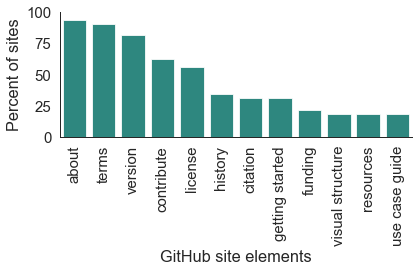

In [10]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.7)
all_pages_barplot = sns.barplot(x="GitHub_elements", 
                                y = "percent", 
                                data = all_pages_df, 
                                color="#1F968BFF",
                               order = result_all_pages['GitHub_elements'])
all_pages_barplot.set(xlabel = "GitHub site elements", 
                      ylabel = "Percent of sites")
all_pages_barplot.set_xticklabels(all_pages_barplot.get_xticklabels(), 
                                  rotation=90)
all_pages_barplot.set_xticklabels(['about','terms','version','contribute','license','history','citation','getting started','funding','visual structure','resources','use case guide'])
sns.despine(top=True)
plt.tight_layout(h_pad=2)
plt.ylim(0,100)
#plt.savefig('figures/all__repositories.jpg', dpi=300)